<a href="https://colab.research.google.com/github/Priyanshu-4096/21BDS0083_EDA/blob/main/21BDS0083_eda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Priyanshu Joarder
Reg no - 21BDS0083
Course Title - Exploratory Data Analysis
Course Code - BCSE331L

Load the Dataset and explore Dimension

In [2]:
import pandas as pd

# Load dataset (replace with your dataset path)
file_path = "/content/SuicideChina.csv"
data = pd.read_csv(file_path)

### Exploring the Dimensions of the Dataset

# 1. Get the number of rows and columns (dimensions)
num_rows, num_columns = data.shape

# 2. Maximum value for each numerical column
max_values_numerical = data.select_dtypes(include=['number']).max()

# 3. Maximum length of categorical/text fields (if applicable)
max_length_categorical = data.select_dtypes(include=['object']).applymap(len).max()

# 4. Maximum number of unique values per column (categorical and numerical)
max_unique_values = data.apply(lambda col: col.nunique())

### Summary of Results
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print("\nMaximum Values for Numerical Columns:\n", max_values_numerical)
print("\nMaximum Length of Categorical/Text Columns:\n", max_length_categorical)
print("\nMaximum Number of Unique Values per Column:\n", max_unique_values)

# Optionally, you can return the results in a dictionary format
summary_results = {
    "num_rows": num_rows,
    "num_columns": num_columns,
    "max_values_numerical": max_values_numerical,
    "max_length_categorical": max_length_categorical,
    "max_unique_values": max_unique_values
}

summary_results


Number of Rows: 2571
Number of Columns: 12

Maximum Values for Numerical Columns:
 rownames     2571
Person_ID    2571
Year         2011
Month          12
Age           100
dtype: int64

Maximum Length of Categorical/Text Columns:
 Hospitalised     3
Died             3
Urban            7
Sex              6
Education        9
Occupation      16
method          13
dtype: int64

Maximum Number of Unique Values per Column:
 rownames        2571
Person_ID       2571
Hospitalised       2
Died               2
Urban              3
Year               3
Month             12
Sex                2
Age               87
Education          5
Occupation        10
method             9
dtype: int64


<ipython-input-2-2886fe9b01f9>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_length_categorical = data.select_dtypes(include=['object']).applymap(len).max()


{'num_rows': 2571,
 'num_columns': 12,
 'max_values_numerical': rownames     2571
 Person_ID    2571
 Year         2011
 Month          12
 Age           100
 dtype: int64,
 'max_length_categorical': Hospitalised     3
 Died             3
 Urban            7
 Sex              6
 Education        9
 Occupation      16
 method          13
 dtype: int64,
 'max_unique_values': rownames        2571
 Person_ID       2571
 Hospitalised       2
 Died               2
 Urban              3
 Year               3
 Month             12
 Sex                2
 Age               87
 Education          5
 Occupation        10
 method             9
 dtype: int64}

Summary and Data Handling

In [3]:
import pandas as pd

### 1. Summary Statistics (Numerical and Categorical Data)

# Summary for numerical data
summary_numerical = data.describe()

# Summary for categorical data (e.g., counting unique values and the most frequent value)
summary_categorical = data.describe(include=['object'])

# Maximum value for numerical data
max_values_numerical = data.select_dtypes(include=['number']).max()

# Maximum length for categorical/text fields
max_length_categorical = data.select_dtypes(include=['object']).applymap(len).max()

# Maximum number of unique values per column
max_unique_values = data.apply(lambda col: col.nunique())

### 2. Data Handling

# Handle Missing Values
# Fill missing values for numerical columns with the maximum value
data_filled = data.copy()
for column in data.select_dtypes(include=['number']).columns:
    max_value = data[column].max()
    data_filled[column].fillna(max_value, inplace=True)

# Fill missing values for categorical columns with the most frequent value (mode)
for column in data.select_dtypes(include=['object']).columns:
    most_frequent_value = data[column].mode()[0]
    data_filled[column].fillna(most_frequent_value, inplace=True)

# Handle Duplicates
# Check for duplicate rows
duplicate_rows = data_filled.duplicated().sum()

# Remove duplicate rows
data_deduplicated = data_filled.drop_duplicates()

### 3. Summary of Results

print("Numerical Data Summary:\n", summary_numerical)
print("\nCategorical Data Summary:\n", summary_categorical)
print("\nMaximum Values for Numerical Columns:\n", max_values_numerical)
print("\nMaximum Length of Categorical/Text Columns:\n", max_length_categorical)
print("\nMaximum Number of Unique Values per Column:\n", max_unique_values)
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Optionally, you can return the results in a dictionary format
summary_results = {
    "summary_numerical": summary_numerical,
    "summary_categorical": summary_categorical,
    "max_values_numerical": max_values_numerical,
    "max_length_categorical": max_length_categorical,
    "max_unique_values": max_unique_values,
    "duplicate_rows_count": duplicate_rows
}

summary_results


Numerical Data Summary:
           rownames    Person_ID         Year        Month          Age
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000
mean   1286.000000  1286.000000  2010.045508     6.298327    52.630883
std     742.328095   742.328095     0.791412     3.202515    19.783878
min       1.000000     1.000000  2009.000000     1.000000    12.000000
25%     643.500000   643.500000  2009.000000     4.000000    37.000000
50%    1286.000000  1286.000000  2010.000000     6.000000    53.000000
75%    1928.500000  1928.500000  2011.000000     9.000000    69.000000
max    2571.000000  2571.000000  2011.000000    12.000000   100.000000

Categorical Data Summary:
        Hospitalised  Died Urban     Sex  Education Occupation     method
count          2571  2571  2571    2571       2571       2571       2571
unique            2     2     3       2          5         10          9
top             yes    no    no  female  Secondary    farming  Pesticide
freq           1

<ipython-input-3-71aec74613b4>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_length_categorical = data.select_dtypes(include=['object']).applymap(len).max()


{'summary_numerical':           rownames    Person_ID         Year        Month          Age
 count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000
 mean   1286.000000  1286.000000  2010.045508     6.298327    52.630883
 std     742.328095   742.328095     0.791412     3.202515    19.783878
 min       1.000000     1.000000  2009.000000     1.000000    12.000000
 25%     643.500000   643.500000  2009.000000     4.000000    37.000000
 50%    1286.000000  1286.000000  2010.000000     6.000000    53.000000
 75%    1928.500000  1928.500000  2011.000000     9.000000    69.000000
 max    2571.000000  2571.000000  2011.000000    12.000000   100.000000,
 'summary_categorical':        Hospitalised  Died Urban     Sex  Education Occupation     method
 count          2571  2571  2571    2571       2571       2571       2571
 unique            2     2     3       2          5         10          9
 top             yes    no    no  female  Secondary    farming  Pesticide
 freq      

Data Cleaning

In [5]:
! pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=267e184e593a4a3a3b7206dbf9ccada0a163d19b54daa022a91bad2464602201
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=25fb290c35ac7d4d005444daca6c6414195bc02e8b93a0e8a2f2d4d9cb530376
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer


### 1. Data Cleaning: Replacing Values
data_cleaned = data.copy()

# Example: Replace 'yes'/'no' in categorical columns with 1/0
if 'Hospitalised' in data_cleaned.columns:
    data_cleaned['Hospitalised'] = data_cleaned['Hospitalised'].replace({'yes': 1, 'no': 0})

if 'Urban' in data_cleaned.columns:
    data_cleaned['Urban'] = data_cleaned['Urban'].replace({'yes': 1, 'no': 0})

if 'Died' in data_cleaned.columns:
    data_cleaned['Died'] = data_cleaned['Died'].replace({'yes': 1, 'no': 0})

# Replace any negative values in 'Age' with NaN
if 'Age' in data_cleaned.columns:
    data_cleaned['Age'] = data_cleaned['Age'].apply(lambda x: np.nan if x < 0 else x)

### 2. Discretization and Binning (for 'Age' column if it exists)
if 'Age' in data_cleaned.columns:
    age_bins = [0, 18, 35, 60, np.inf]
    age_labels = ['0-18', '19-35', '36-60', '60+']
    data_cleaned['Age_Binned'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels)

### 3. Handling Missing Data

# Traditional imputation for 'Age' column using mean (if it exists)
if 'Age' in data_cleaned.columns:
    imputer_mean = SimpleImputer(strategy='mean')
    data_cleaned['Age'] = imputer_mean.fit_transform(data_cleaned[['Age']])

#### Maximum Likelihood Estimation (MLE) using IterativeImputer for numerical columns
mle_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply MLE to the numerical columns (use select_dtypes to pick only numerical columns)
numerical_columns = data_cleaned.select_dtypes(include=[np.number])
data_imputed = mle_imputer.fit_transform(numerical_columns)

# Convert imputed numerical data back to DataFrame format
data_cleaned_imputed = pd.DataFrame(data_imputed, columns=numerical_columns.columns)

### Output Cleaned Data
print("Cleaned Data Sample:\n", data_cleaned.head())


Cleaned Data Sample:
    rownames  Person_ID  Hospitalised  Died Urban  Year  Month     Sex   Age  \
0         1          1             1     0     0  2010     12  female  39.0   
1         2          2             0     1     0  2009      3    male  83.0   
2         3          3             0     1     0  2010      2    male  60.0   
3         4          4             0     1     0  2011      1    male  73.0   
4         5          5             1     0     0  2009      8    male  51.0   

   Education Occupation        method Age_Binned  
0  Secondary  household  Other poison      36-60  
1    primary    farming       Hanging        60+  
2    primary    farming       Hanging      36-60  
3    primary    farming       Hanging        60+  
4  Secondary    farming     Pesticide      36-60  


Univariate Analysis

Summary Statistics for Numerical Columns (Cleaned Data):
                count         mean         std     min     25%     50%     75%  \
rownames      2571.0  1286.000000  742.328095     1.0   643.5  1286.0  1928.5   
Person_ID     2571.0  1286.000000  742.328095     1.0   643.5  1286.0  1928.5   
Hospitalised  2571.0     0.604045    0.489150     0.0     0.0     1.0     1.0   
Died          2571.0     0.488526    0.499966     0.0     0.0     0.0     1.0   
Year          2571.0  2010.045508    0.791412  2009.0  2009.0  2010.0  2011.0   
Month         2571.0     6.298327    3.202515     1.0     4.0     6.0     9.0   
Age           2571.0    52.630883   19.783878    12.0    37.0    53.0    69.0   

                 max       variance  skewness  kurtosis  
rownames      2571.0  551051.000000  0.000000 -1.200000  
Person_ID     2571.0  551051.000000  0.000000 -1.200000  
Hospitalised     1.0       0.239268 -0.425743 -1.820159  
Died             1.0       0.249966  0.045935 -1.999446  
Yea

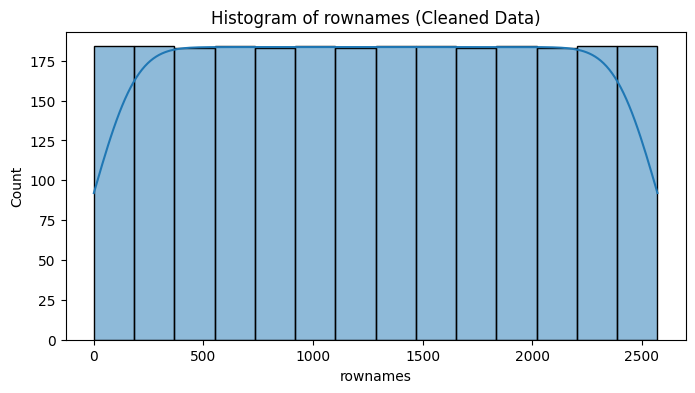

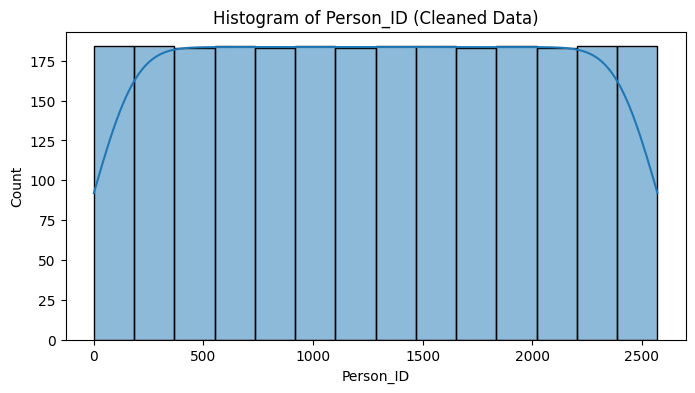

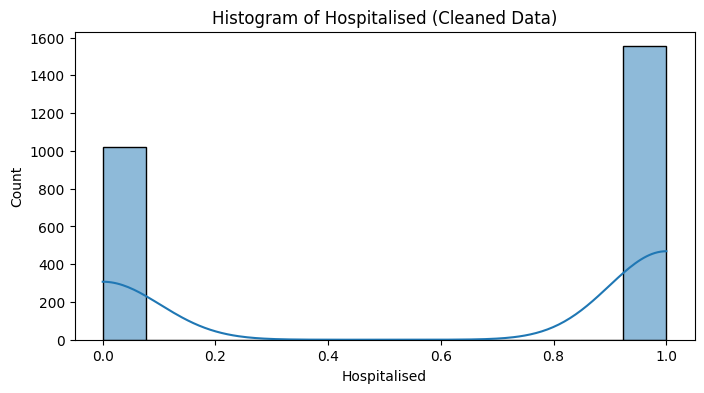

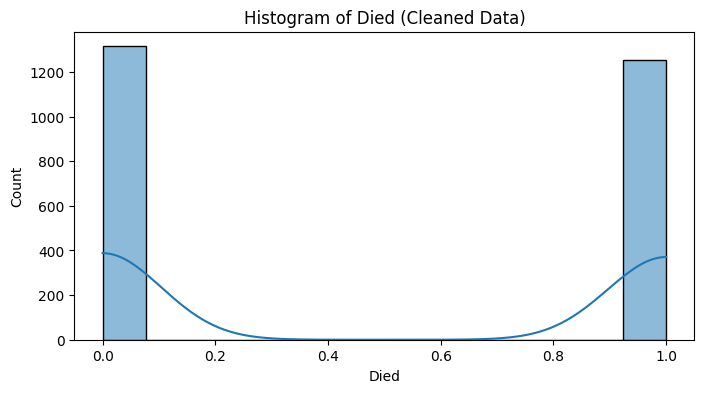

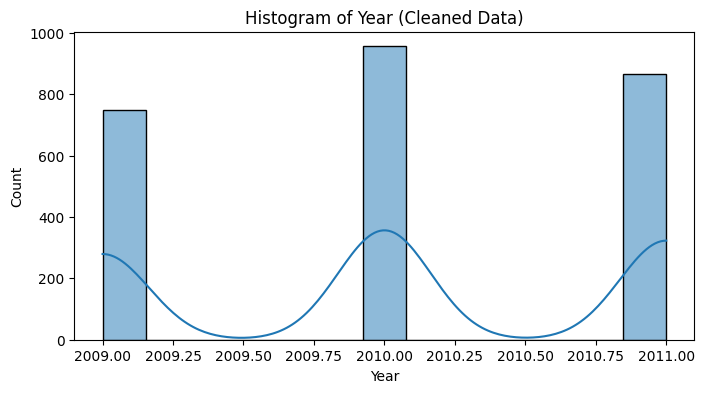

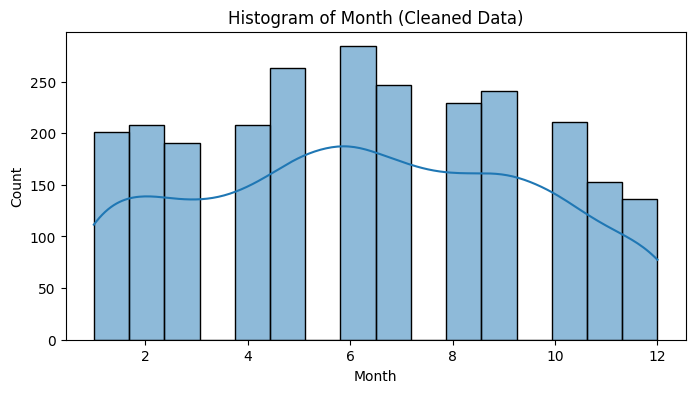

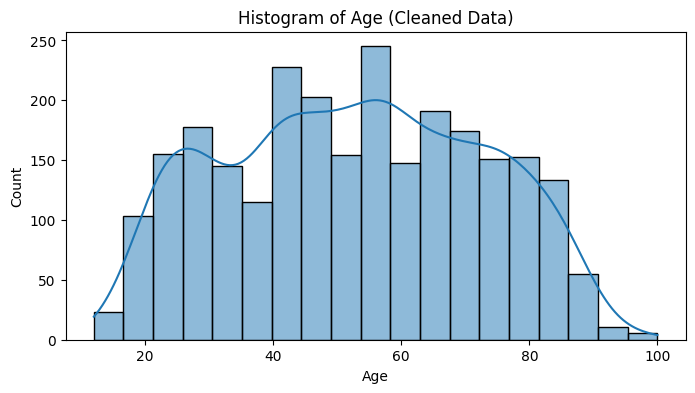

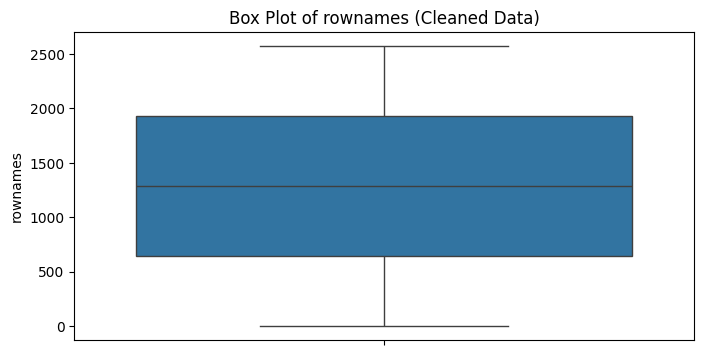

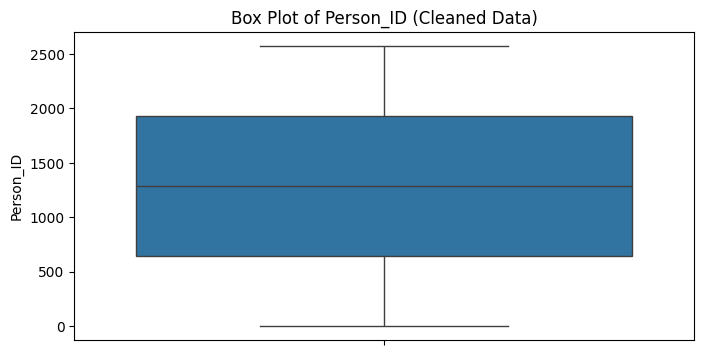

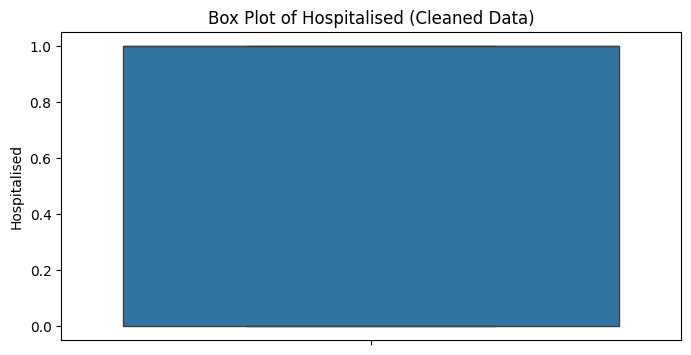

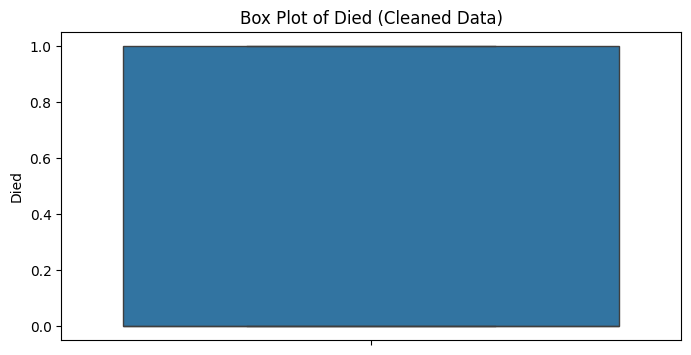

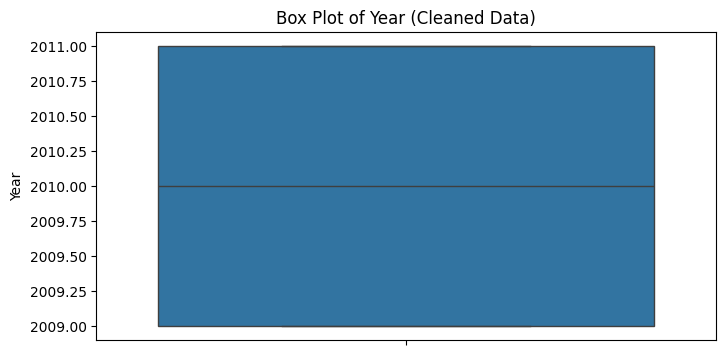

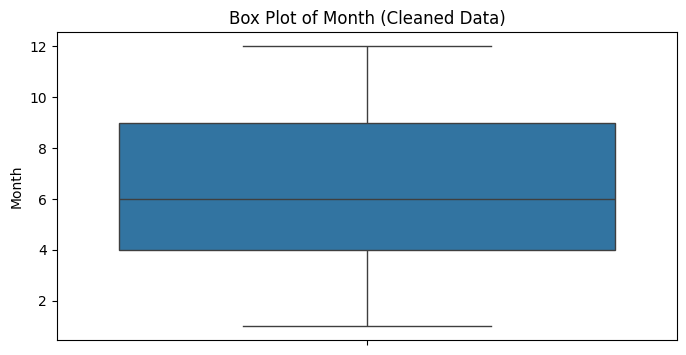

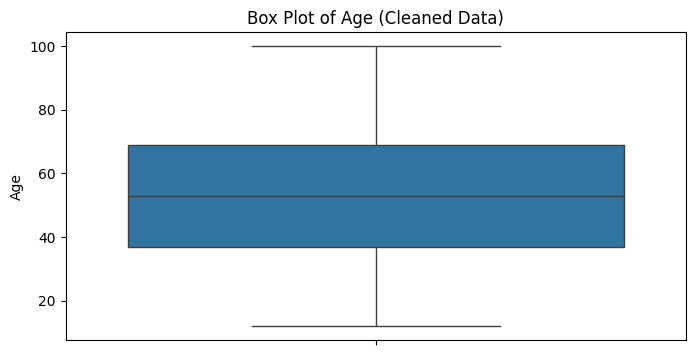

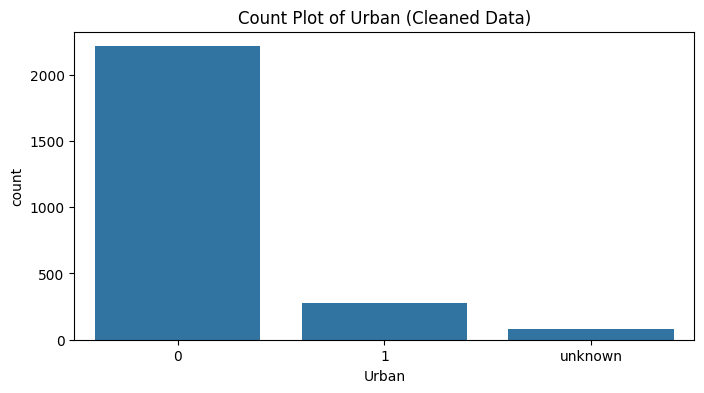

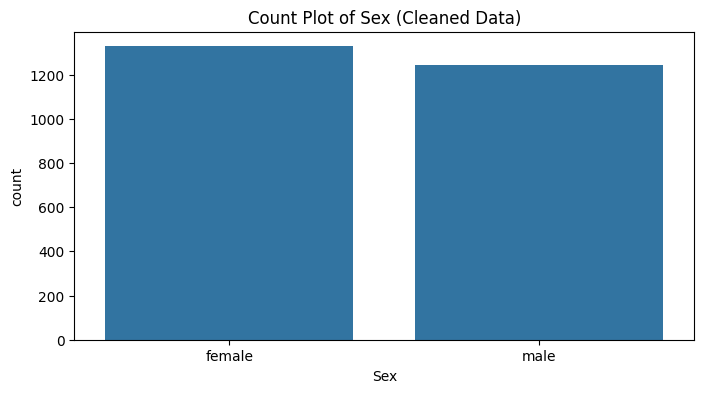

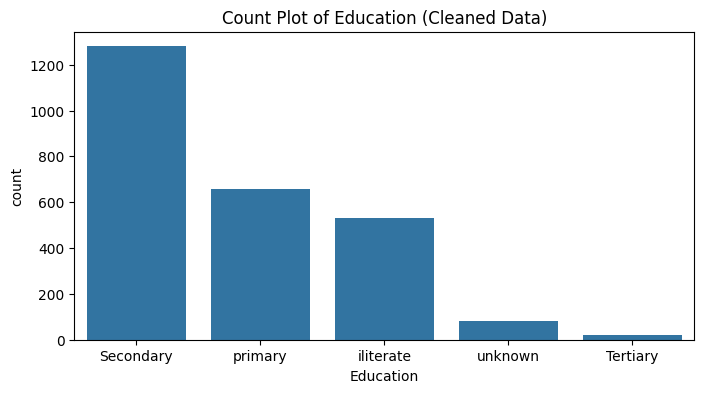

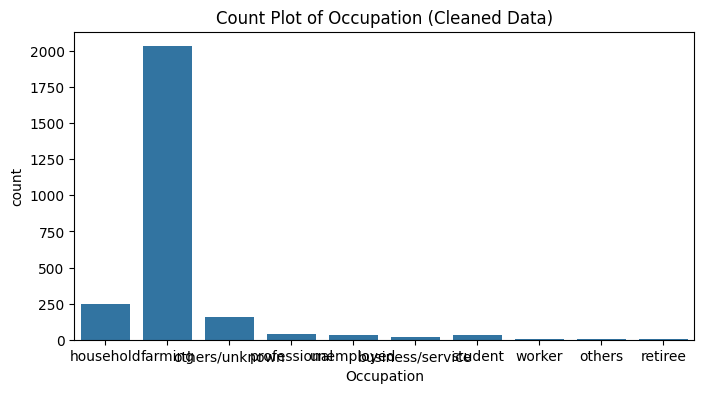

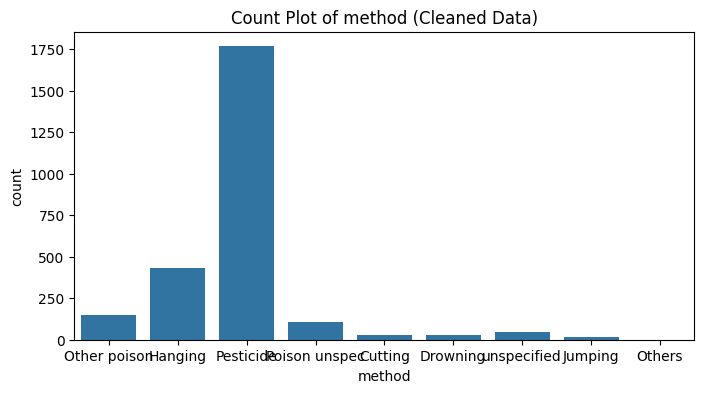

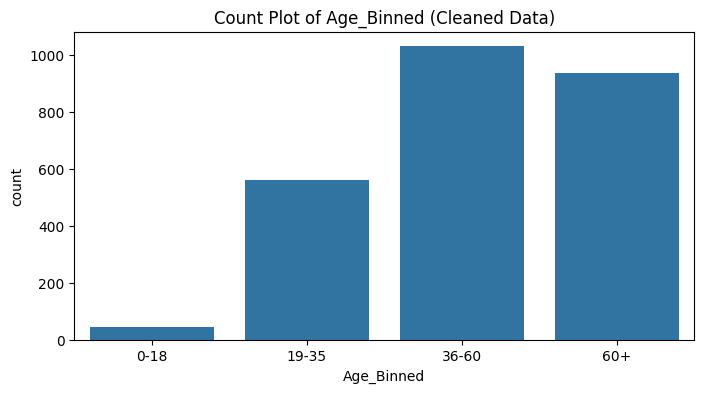


Missing Data Percentage for Each Column (Cleaned Data):
 Series([], dtype: float64)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Summary Statistics for Numerical Columns (Cleaned Data)

# Extract numerical columns from the cleaned data
numerical_cols_cleaned = data_cleaned.select_dtypes(include=[np.number])

# Display summary statistics (mean, median, std, variance, etc.)
summary_stats_cleaned = numerical_cols_cleaned.describe().T  # Transpose for better readability
summary_stats_cleaned['variance'] = numerical_cols_cleaned.var()
summary_stats_cleaned['skewness'] = numerical_cols_cleaned.skew()
summary_stats_cleaned['kurtosis'] = numerical_cols_cleaned.kurt()

print("Summary Statistics for Numerical Columns (Cleaned Data):\n", summary_stats_cleaned)

### 2. Frequency Analysis for Categorical Columns (Cleaned Data)

# Extract categorical columns from the cleaned data
categorical_cols_cleaned = data_cleaned.select_dtypes(include=['object', 'category'])

# Perform frequency analysis (value counts) for each categorical variable in the cleaned data
for col in categorical_cols_cleaned.columns:
    print(f"\nFrequency Analysis for '{col}' (Cleaned Data):")
    print(data_cleaned[col].value_counts())

### 3. Visualizations (Cleaned Data)

# Create histograms for each numerical column in the cleaned data
for col in numerical_cols_cleaned.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f"Histogram of {col} (Cleaned Data)")
    plt.show()

# Create box plots for each numerical column in the cleaned data
for col in numerical_cols_cleaned.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_cleaned[col])
    plt.title(f"Box Plot of {col} (Cleaned Data)")
    plt.show()

# Create count plots for each categorical column in the cleaned data
for col in categorical_cols_cleaned.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data_cleaned)
    plt.title(f"Count Plot of {col} (Cleaned Data)")
    plt.show()

### 4. Missing Data Summary (Cleaned Data - Optional)

# Check missing data percentage for the cleaned data
missing_data_percent_cleaned = data_cleaned.isnull().mean() * 100
print("\nMissing Data Percentage for Each Column (Cleaned Data):\n", missing_data_percent_cleaned[missing_data_percent_cleaned > 0])


Bivariate Analysis

Correlation Matrix:
               rownames  Person_ID  Hospitalised      Died      Year     Month  \
rownames      1.000000   1.000000      0.071449 -0.066026  0.014625 -0.017492   
Person_ID     1.000000   1.000000      0.071449 -0.066026  0.014625 -0.017492   
Hospitalised  0.071449   0.071449      1.000000 -0.828431 -0.015754  0.016815   
Died         -0.066026  -0.066026     -0.828431  1.000000  0.058848 -0.019854   
Year          0.014625   0.014625     -0.015754  0.058848  1.000000  0.009380   
Month        -0.017492  -0.017492      0.016815 -0.019854  0.009380  1.000000   
Age          -0.040988  -0.040988     -0.423341  0.440377 -0.017267 -0.028397   

                   Age  
rownames     -0.040988  
Person_ID    -0.040988  
Hospitalised -0.423341  
Died          0.440377  
Year         -0.017267  
Month        -0.028397  
Age           1.000000  


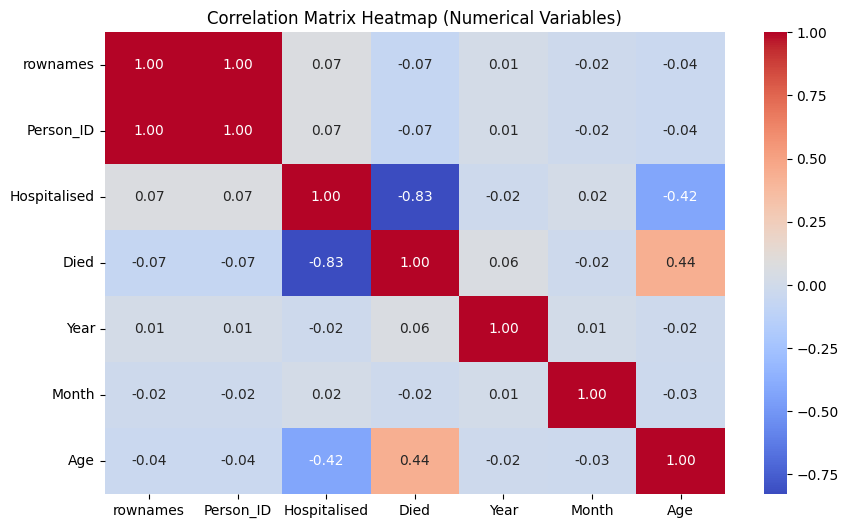

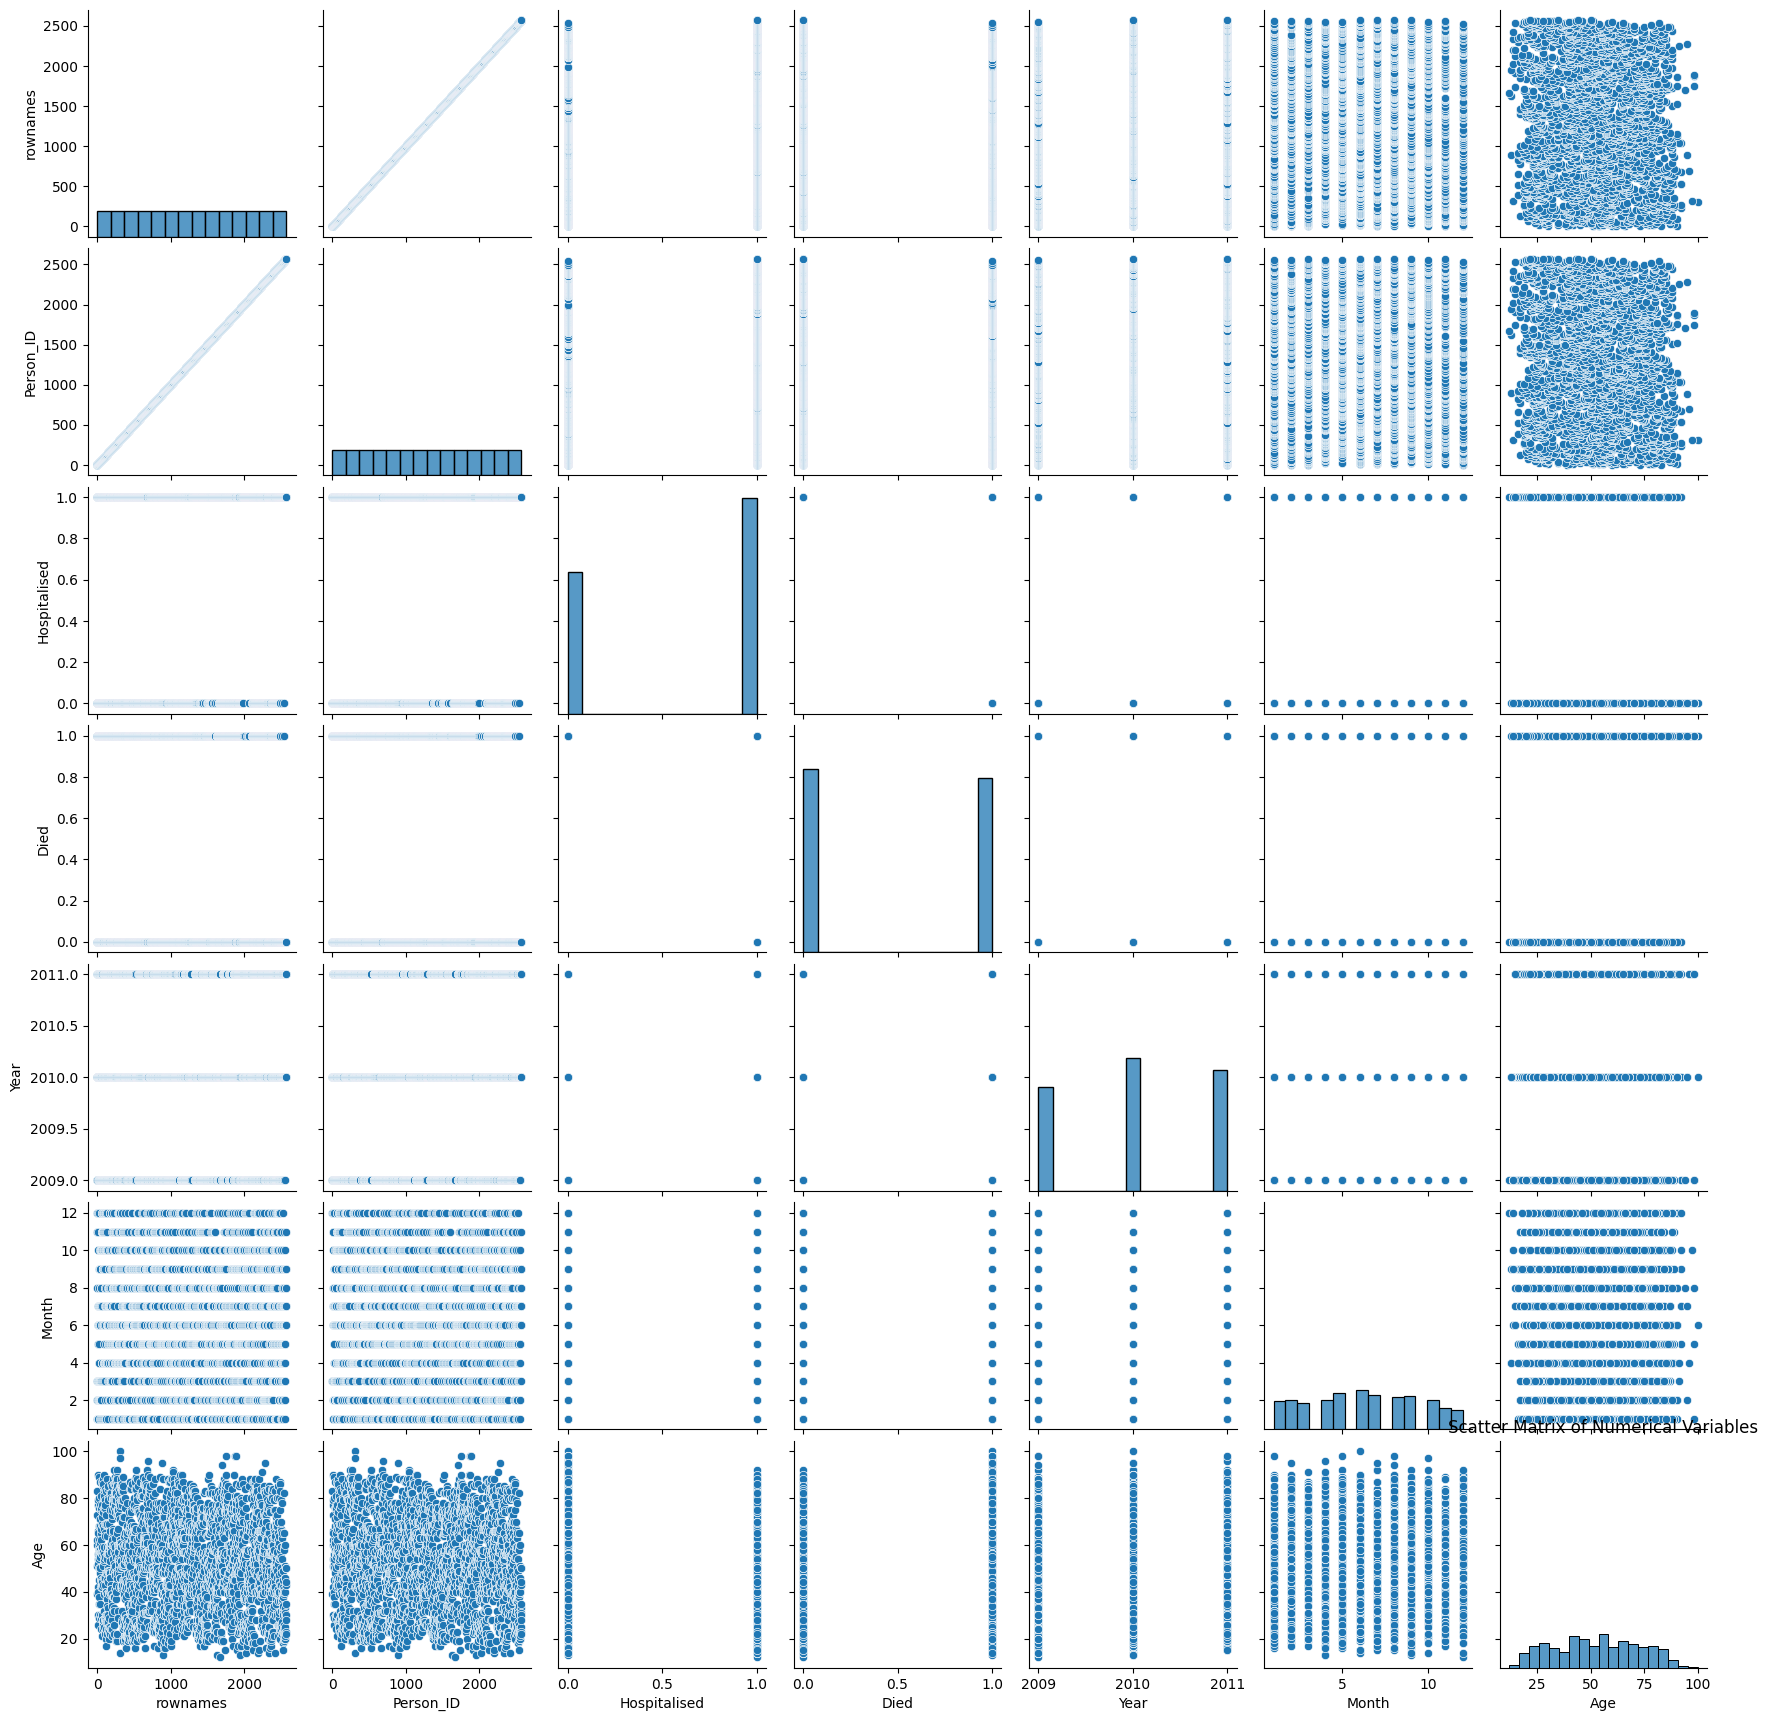

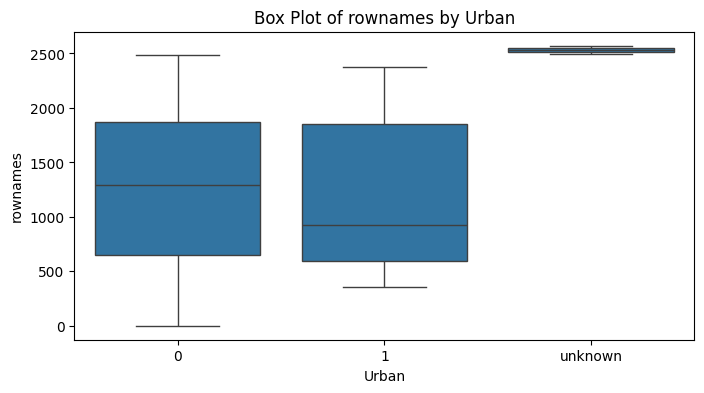

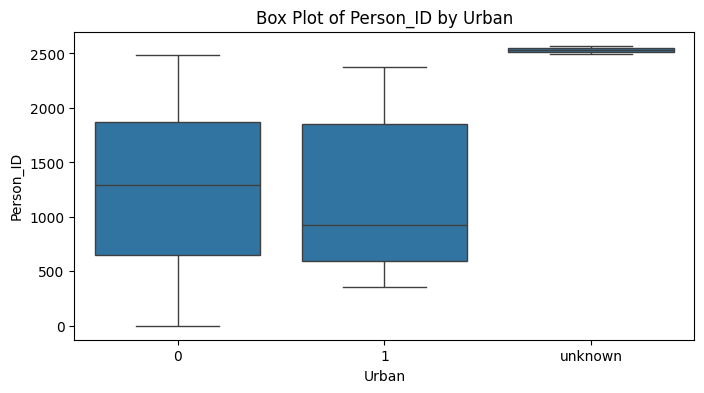

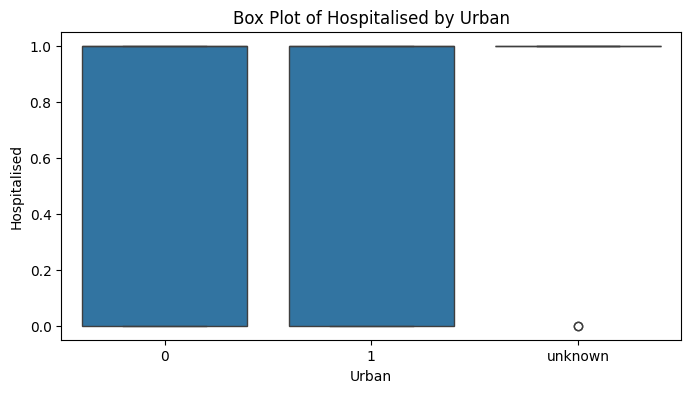

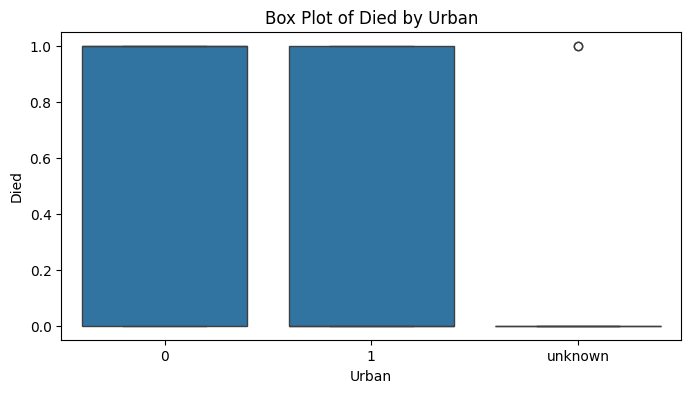

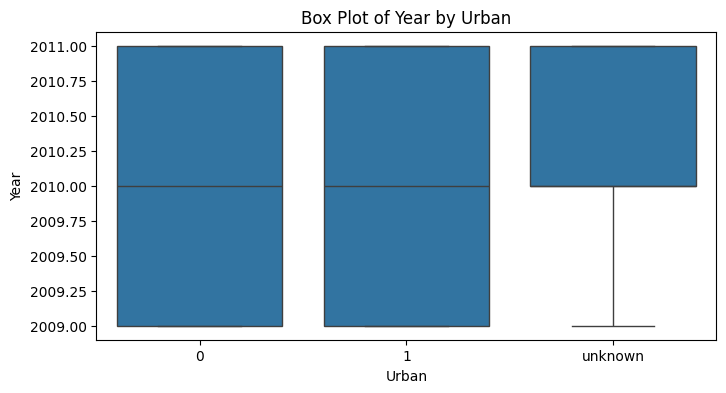

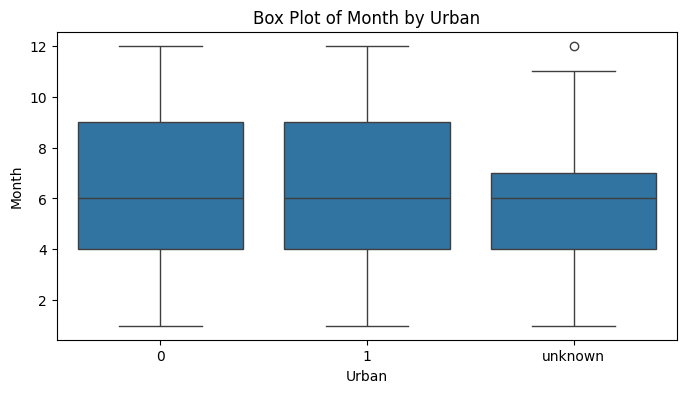

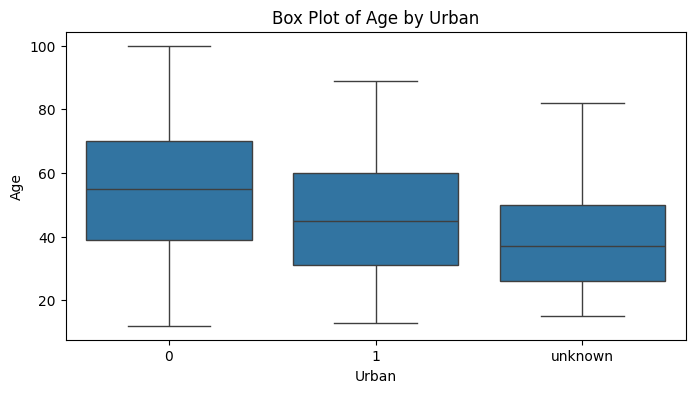

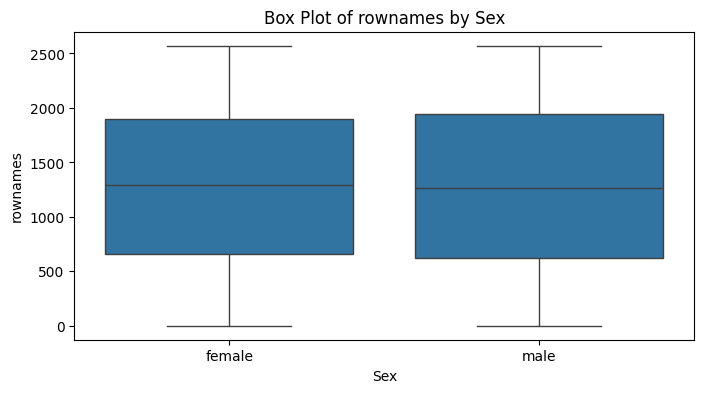

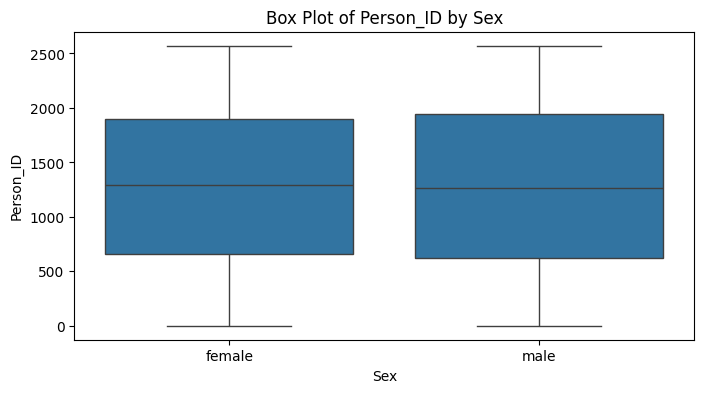

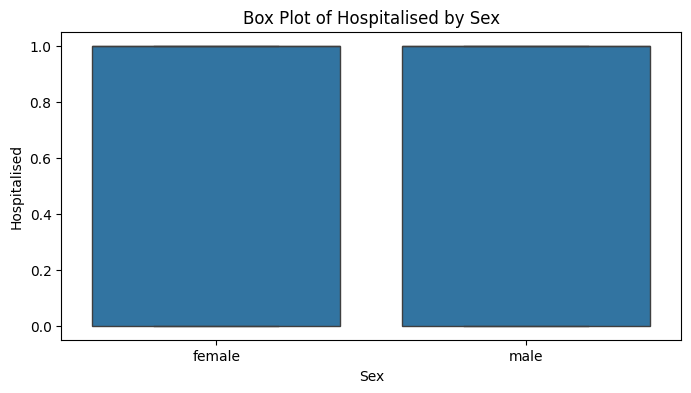

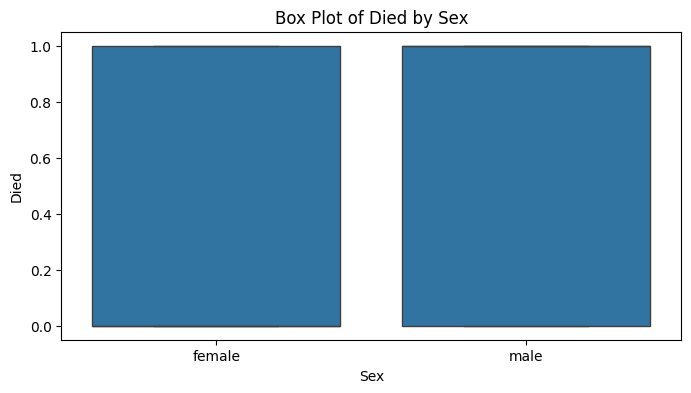

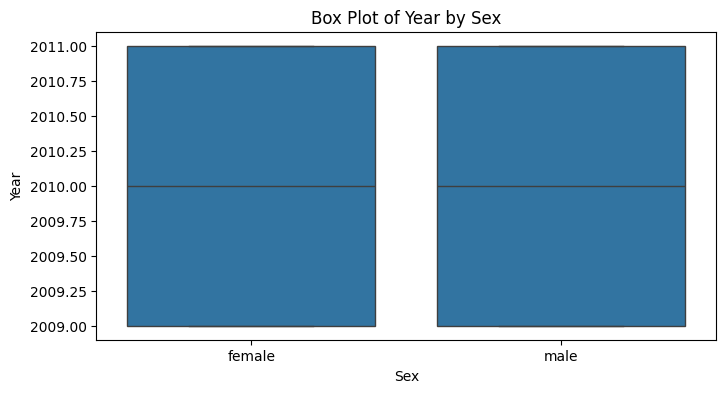

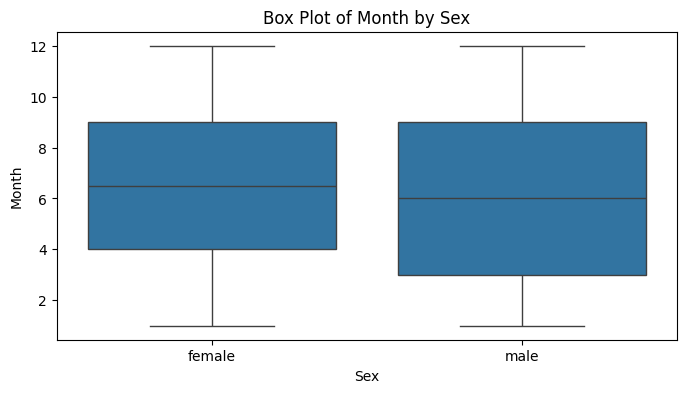

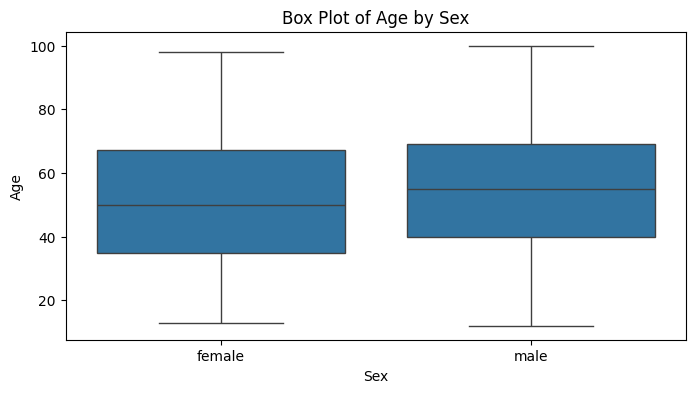

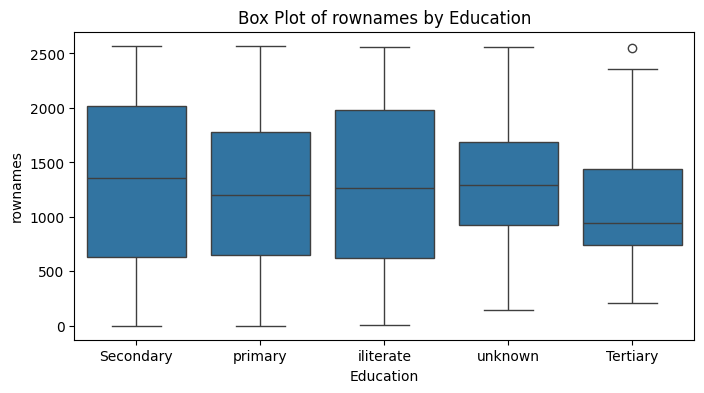

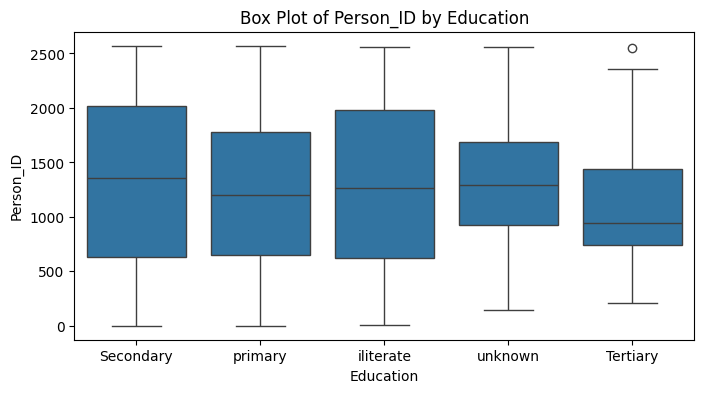

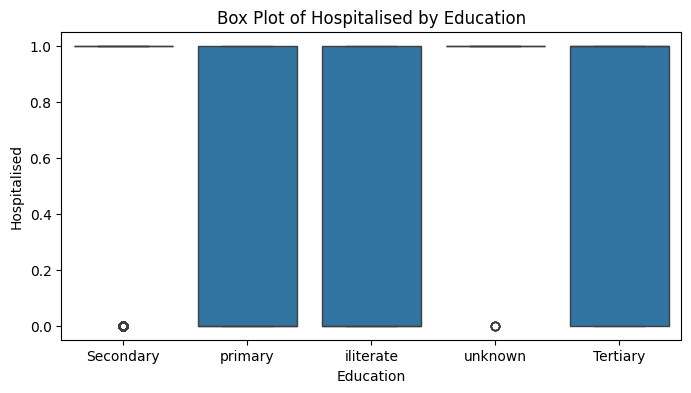

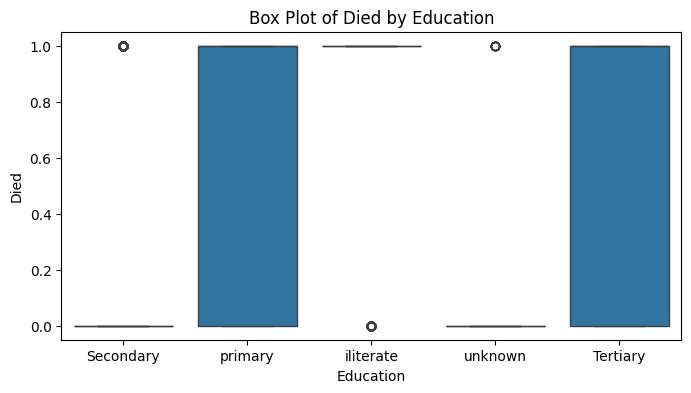

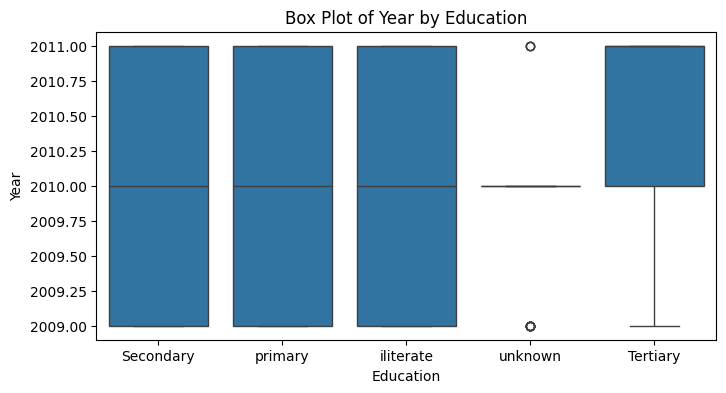

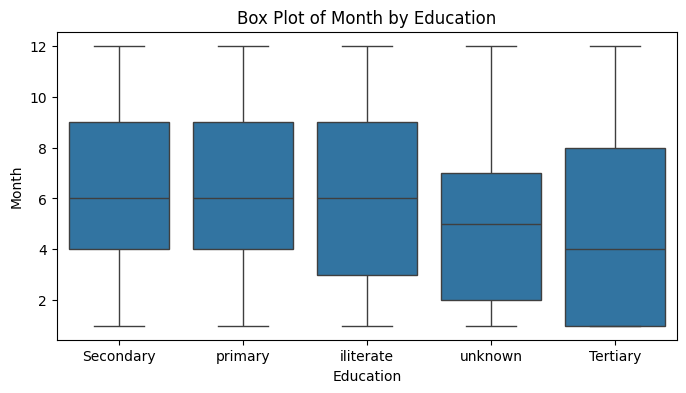

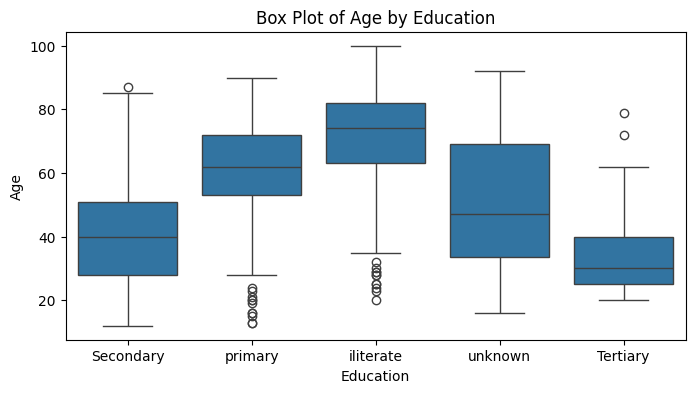

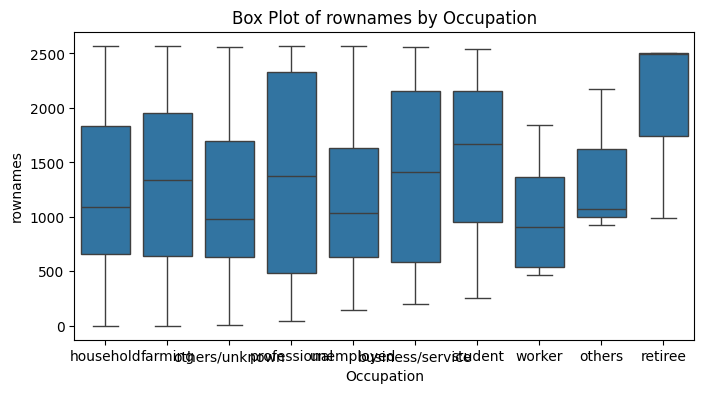

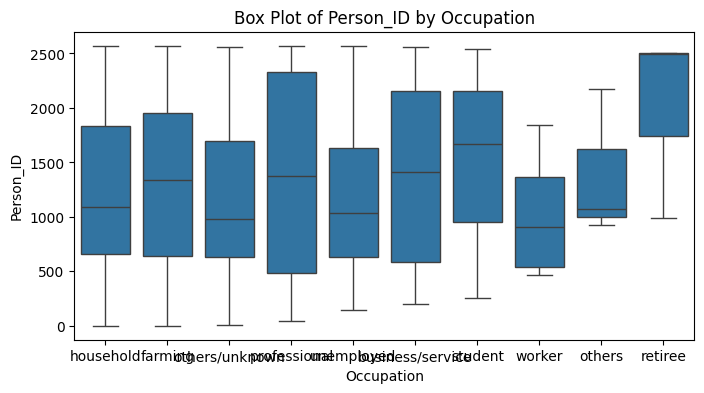

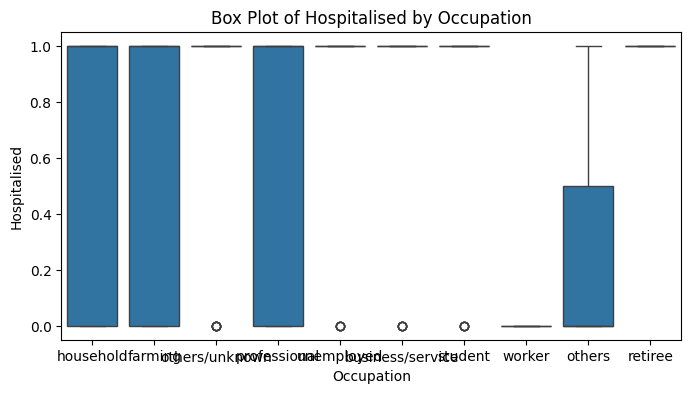

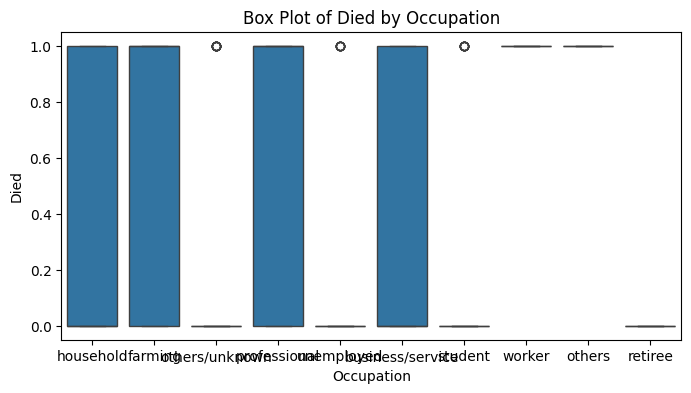

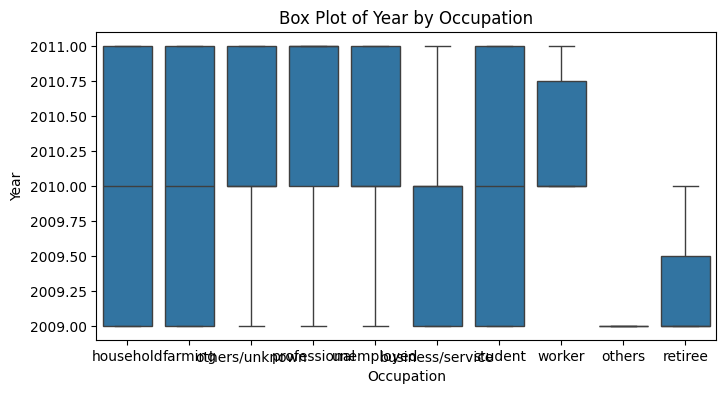

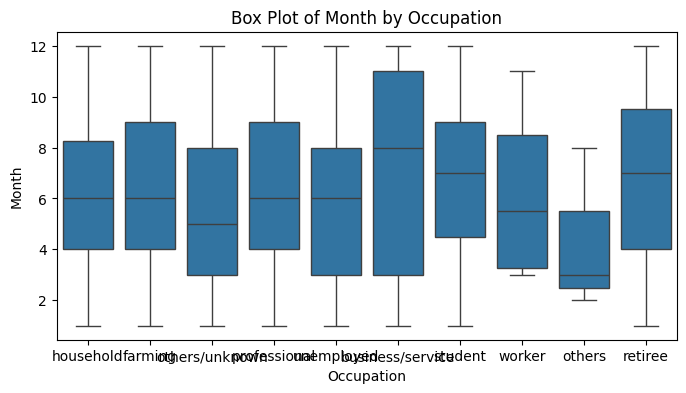

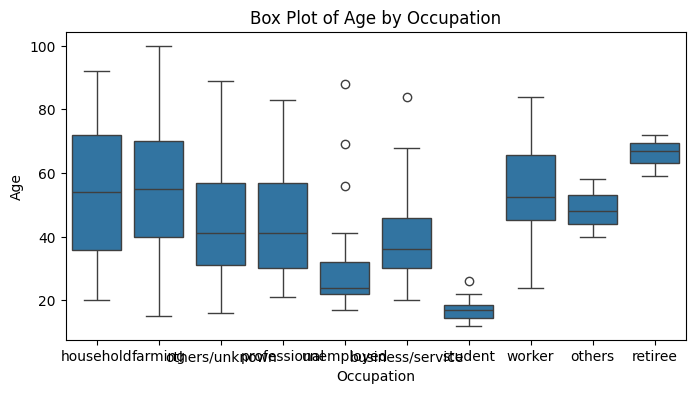

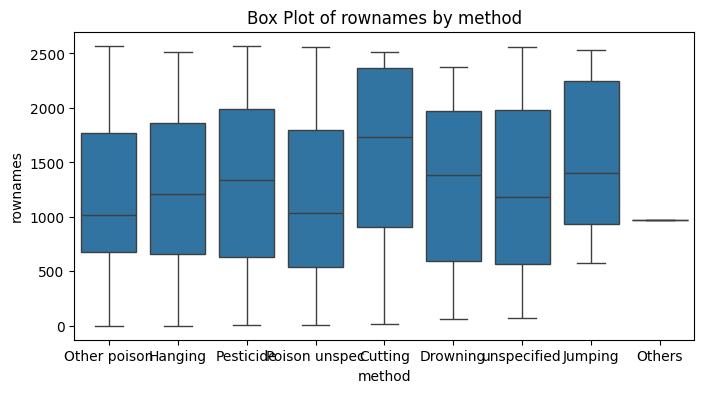

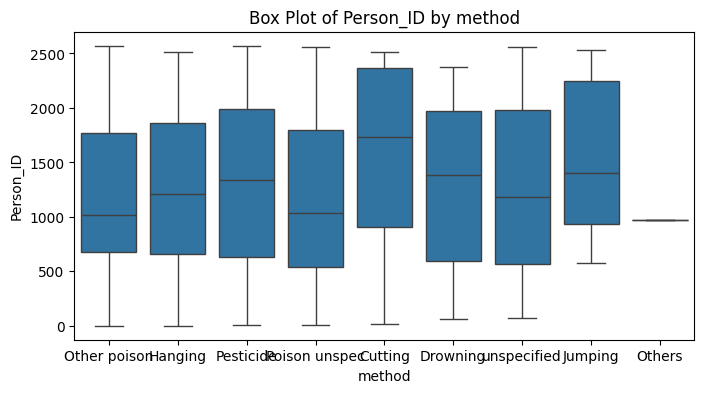

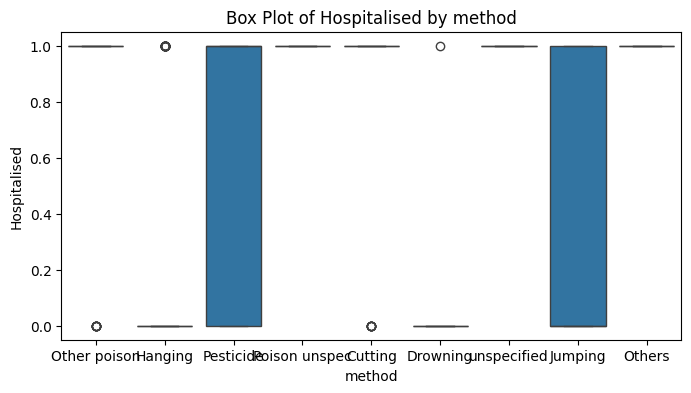

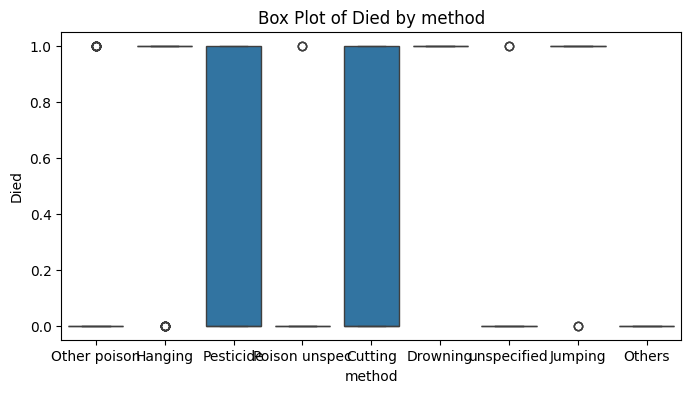

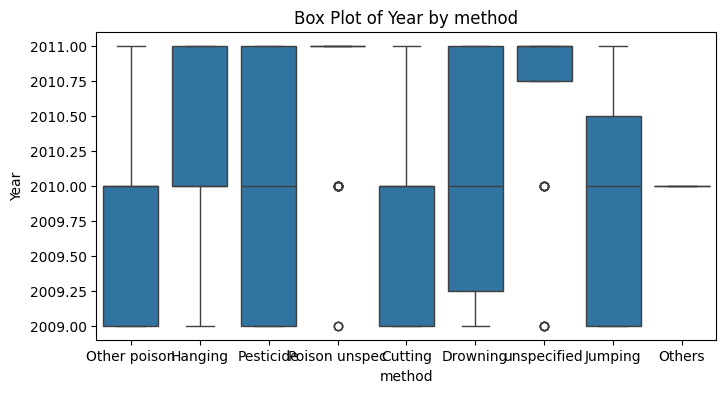

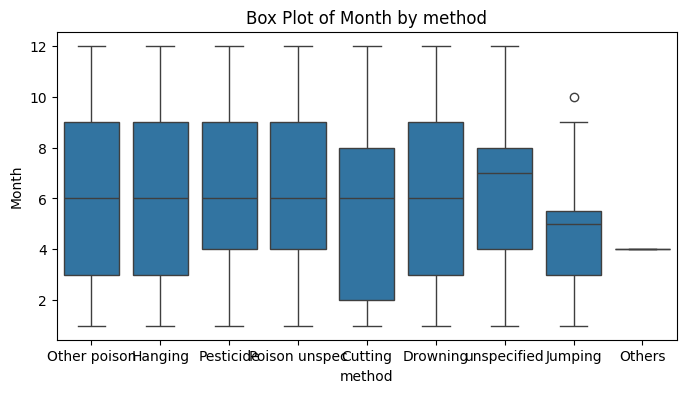

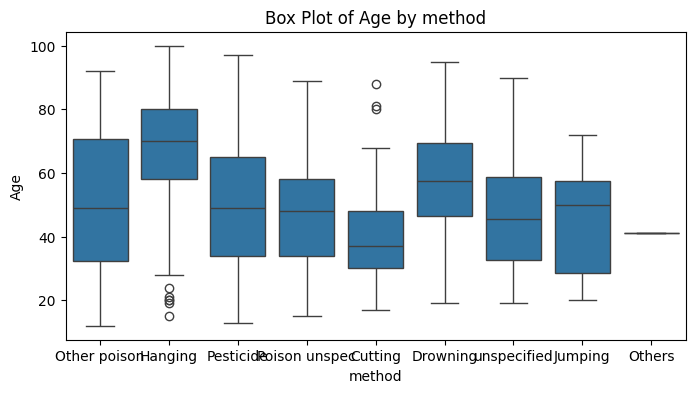

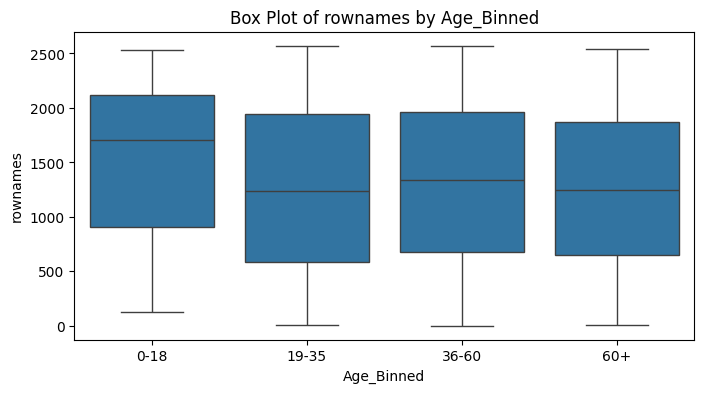

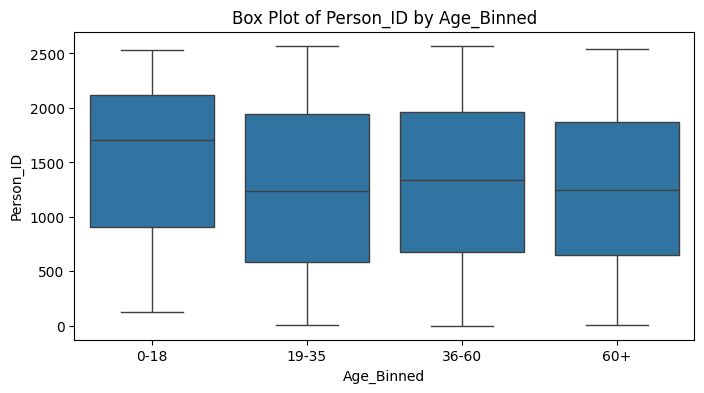

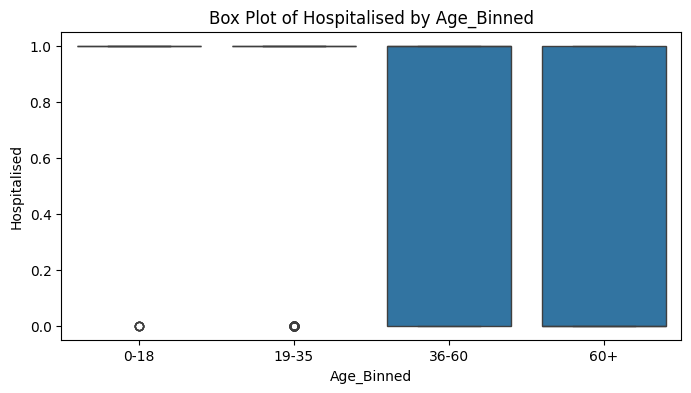

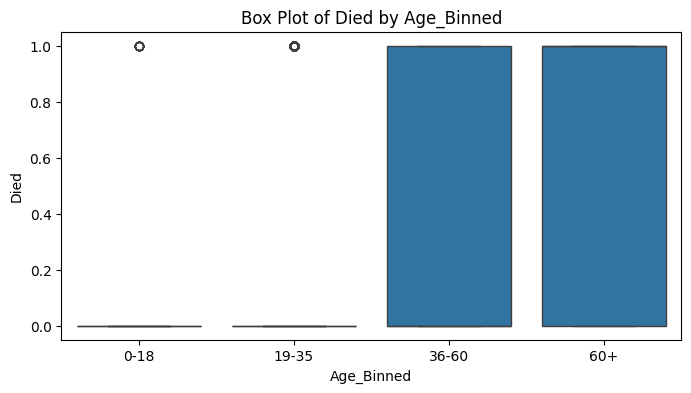

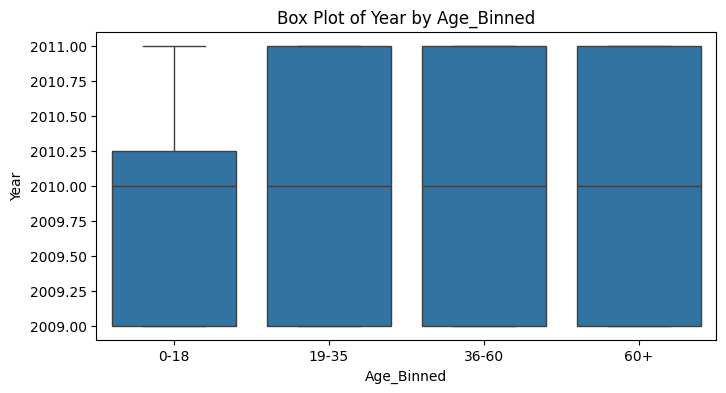

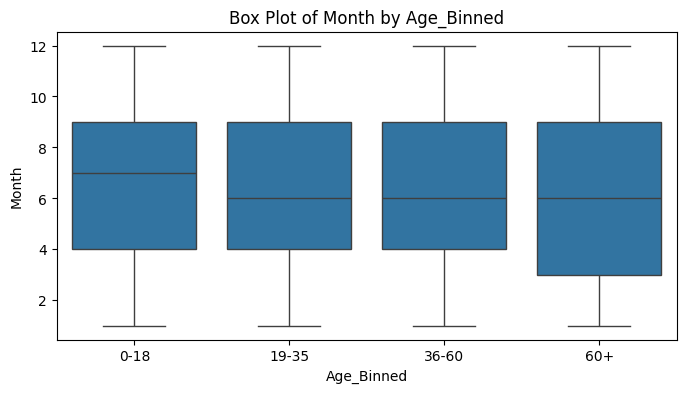

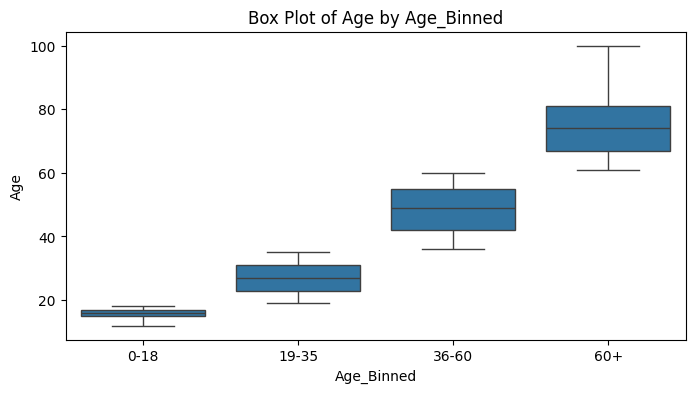

Grouped Summary Statistics (Mean) for Urban:
             rownames    Person_ID  Hospitalised      Died         Year  \
Urban                                                                    
0        1254.358789  1254.358789      0.576141  0.515590  2010.047899   
1        1174.725632  1174.725632      0.718412  0.407942  2010.000000   
unknown  2531.000000  2531.000000      0.975309  0.024691  2010.135802   

            Month        Age  
Urban                         
0        6.325802  53.823317  
1        6.202166  46.902527  
unknown  5.876543  39.641975  
Grouped Summary Statistics (Mean) for Sex:
            rownames    Person_ID  Hospitalised      Died         Year  \
Sex                                                                     
female  1289.352410  1289.352410      0.646837  0.442018  2010.037651   
male    1282.418343  1282.418343      0.558327  0.538214  2010.053902   

           Month        Age  
Sex                          
female  6.470633  51.530120  
m

<ipython-input-14-9927cd675922>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data_cleaned.groupby(cat_col).mean(numeric_only=True)


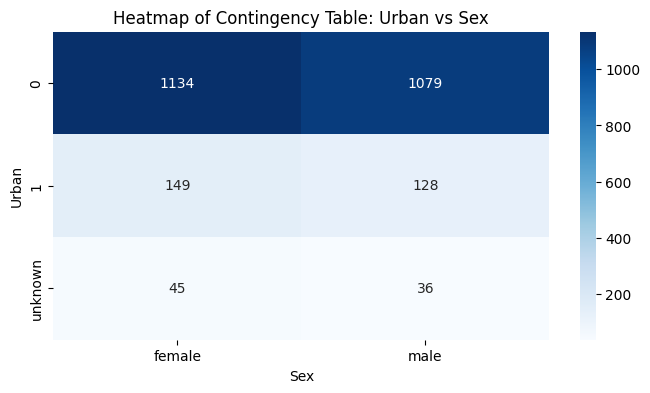


Contingency Table between Urban and Education:
 Education  Secondary  Tertiary  iliterate  primary  unknown
Urban                                                      
0               1054         8        496      606       49
1                162        10         32       46       27
unknown           64         1          5        7        4


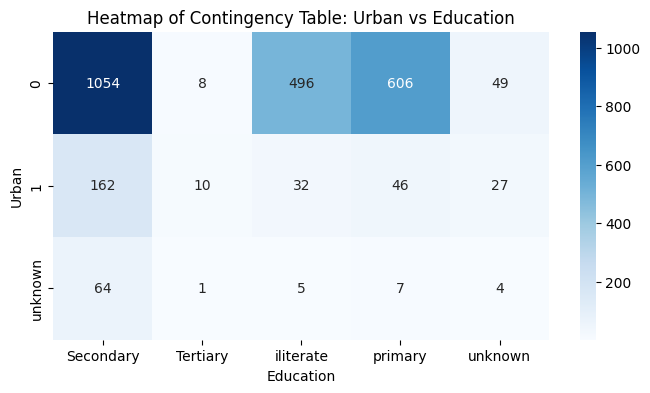


Contingency Table between Urban and Occupation:
 Occupation  business/service  farming  household  others  others/unknown  \
Urban                                                                      
0                          9     1813        215       2             104   
1                          8      162         28       1              47   
unknown                    4       57          5       0               5   

Occupation  professional  retiree  student  unemployed  worker  
Urban                                                           
0                     22        1       22          20       5  
1                     11        0       11           8       1  
unknown                4        2        2           2       0  


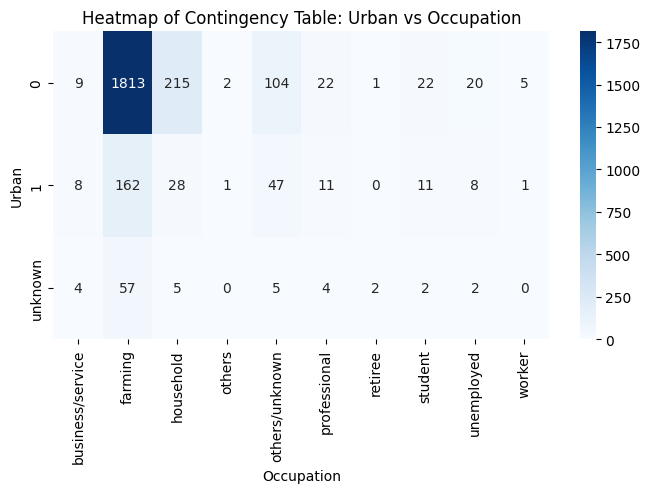


Contingency Table between Urban and method:
 method   Cutting  Drowning  Hanging  Jumping  Other poison  Others  Pesticide  \
Urban                                                                           
0             22        25      394        6           109       0       1526   
1              6         1       35        7            31       1        177   
unknown        1         0        2        2             6       0         65   

method   Poison unspec  unspecified  
Urban                                
0                   92           39  
1                   14            5  
unknown              1            4  


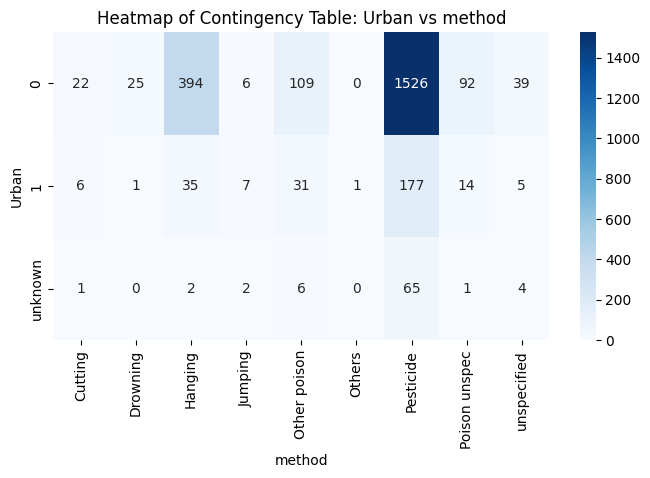

TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the cleaned data is already loaded in `data_cleaned`

### 1. Numerical-Numerical Bivariate Analysis

# Correlation Matrix
numerical_cols_cleaned = data_cleaned.select_dtypes(include=[np.number])
corr_matrix = numerical_cols_cleaned.corr()

print("Correlation Matrix:\n", corr_matrix)

# Visualizing Correlation Matrix with Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap (Numerical Variables)")
plt.show()

# Scatter Plots for Pairwise Numerical Variables
sns.pairplot(numerical_cols_cleaned)
plt.title("Scatter Matrix of Numerical Variables")
plt.show()

### 2. Numerical-Categorical Bivariate Analysis

# Extract categorical columns from the cleaned data
categorical_cols_cleaned = data_cleaned.select_dtypes(include=['object', 'category'])

# Box Plots for Numerical vs Categorical variables
for cat_col in categorical_cols_cleaned.columns:
    for num_col in numerical_cols_cleaned.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat_col, y=num_col, data=data_cleaned)
        plt.title(f"Box Plot of {num_col} by {cat_col}")
        plt.show()

# Grouped Summary Statistics (Mean of Numerical Variables by Categorical Variables)
for cat_col in categorical_cols_cleaned.columns:
    grouped_stats = data_cleaned.groupby(cat_col).mean(numeric_only=True)
    print(f"Grouped Summary Statistics (Mean) for {cat_col}:\n", grouped_stats)

### 3. Categorical-Categorical Bivariate Analysis (Skipping problematic cross-tabulations)

# Before cross-tabulation, drop rows where any categorical variable has missing values.
categorical_cols_cleaned_no_na = categorical_cols_cleaned.dropna()

# Cross-tabulation (Contingency Table) for Categorical Variables - Skipping any missing values
for i, cat_col1 in enumerate(categorical_cols_cleaned_no_na.columns):
    for cat_col2 in categorical_cols_cleaned_no_na.columns[i+1:]:
        crosstab = pd.crosstab(categorical_cols_cleaned_no_na[cat_col1], categorical_cols_cleaned_no_na[cat_col2])
        print(f"\nContingency Table between {cat_col1} and {cat_col2}:\n", crosstab)

        # Heatmap for Contingency Table
        plt.figure(figsize=(8, 4))
        sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
        plt.title(f"Heatmap of Contingency Table: {cat_col1} vs {cat_col2}")
        plt.show()
